In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

Dataset Loaded: 2515 images
Image Shape: (128, 128, 3)


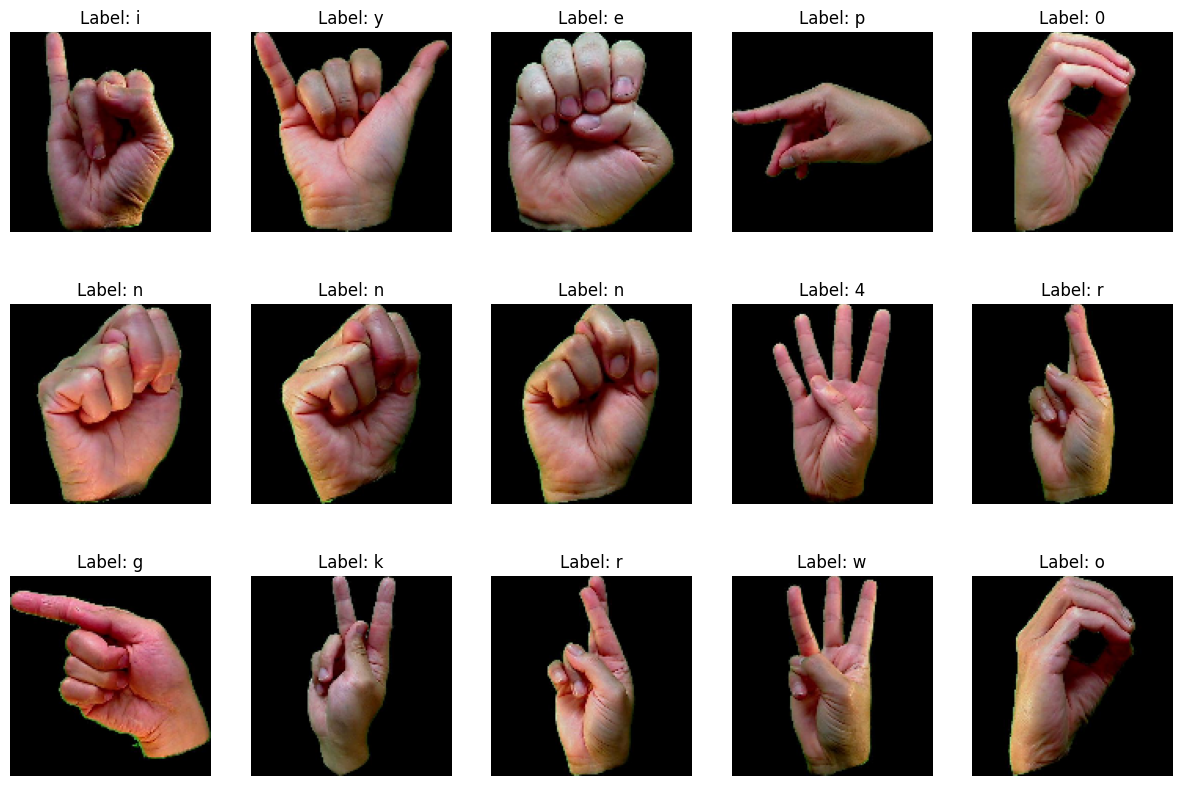

In [ ]:
DATASET_DIR = '/content/drive/MyDrive/asl_dataset'

IMG_HEIGHT = 128
IMG_WIDTH = 128

images = []
labels = []

for folder_name in sorted(os.listdir(DATASET_DIR)):
  folder_path = os.path.join(DATASET_DIR, folder_name)

  if os.path.isdir(folder_path):
    label = folder_name

    for img_name in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_name)

      # load and resize image
      img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
      img_array = img_to_array(img) / 255.0

      images.append(img_array)
      labels.append(label)

images = np.array(images)
labels = np.array(labels)

print(f'Dataset Loaded: {images.shape[0]} images')
print(f'Image Shape: {images.shape[1:]}')

fig,axes = plt.subplots(3,5, figsize=(15,10))
axes = axes.ravel()

for i in range(15):
  idx = np.random.randint(0, len(images))
  axes[i].imshow(images[idx])
  axes[i].set_title(f'Label: {labels[idx]}')
  axes[i].axis('off')

plt.tight_layout
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode labels (a-z, 0-9 -> numerical labels)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

# print dataset shapes
print(f"Training set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {X_test.shape}, Labels: {y_test.shape}")

# display label encoding map
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('\Label Mapping:')
for label, idx in label_map.items():
  print(f"{label}: {idx}")

Training set: (2012, 128, 128, 3), Labels: (2012,)
Testing set: (503, 128, 128, 3), Labels: (503,)
\Label Mapping:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
a: 10
b: 11
c: 12
d: 13
e: 14
f: 15
g: 16
h: 17
i: 18
j: 19
k: 20
l: 21
m: 22
n: 23
o: 24
p: 25
q: 26
r: 27
s: 28
t: 29
u: 30
v: 31
w: 32
x: 33
y: 34
z: 35


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# define the CNN model
def create_model(input_shape, num_classes):
  model = Sequential()

  model.add(Conv2D(32,(3,3), activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

num_classes = len(np.unique(y_train))

#create the model
input_shape = X_train[0].shape
model = create_model(input_shape, num_classes)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,554,468 (25.00 MB)

 Trainable params: 6,554,020 (25.00 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# training parameters
EPOCHS = 20
BATCH_SIZE = 32

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.0522 - loss: 6.3409 - val_accuracy: 0.0278 - val_loss: 8.9700
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.0936 - loss: 3.3811 - val_accuracy: 0.0497 - val_loss: 12.1965
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.1627 - loss: 3.1952 - val_accuracy: 0.0537 - val_loss: 10.5798
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.1659 - loss: 3.1382 - val_accuracy: 0.0795 - val_loss: 7.5229
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.1686 - loss: 3.0872 - val_accuracy: 0.1750 - val_loss: 4.7754
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.1831 - loss: 3.0540 - val_accuracy: 0.2763 - val_loss: 2.7249
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.2025 - loss: 2.9986 - val_accuracy: 0.2048 - val_loss: 5.5523
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.1827 - loss: 3.0204 - val_accuracy: 0.2624 -

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#define test generator
test_datagen = ImageDataGenerator(rescale=1./255) # only rescale, no augmentation for test data

test_generator = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/asl_dataset', target_size=(128,128), batch_size=32,class_mode='categorical', shuffle=False)

#display class indices (for confusion matrix later)
label_map = list(test_generator.class_indices.keys())
print('Class Labels:', label_map)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss: .4f}')
print(f"Test Accuracy: {test_accuracy: .4%}")